<a href="https://colab.research.google.com/github/Claptar/play_around_find_out/blob/main/statistics/correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from numpy.polynomial import Polynomial
from sklearn.metrics import r2_score

sns.set_theme(style="white")

Случайные величины $X$ и $Y$ называются независимыми если их совместная функция распределения фактаризуется (является произведением их функций распределения):

$$
\int f(x, y)dxdy = \int f(x)f(y)dxdy
$$

Что в свою очередь означает, что условные распределение $f(x|y) = f(x)$ остаётся неизменным вне зависимости от значения случайной величины $Y$.


К примеру можно посмотреть на следующую функцию распределения
$$
f(x,y) = \frac{1}{4\pi} exp(-\frac{4(x+2)^2 + y^2}{8})
$$

Это функция распределения двух независимых случайных величин с нормальным распределением $X \sim \mathcal{N}(2, 1)$, $Y\sim\mathcal{N}(0, 4)$. Вот так будут выглядеть линии уровня совместной функции распределения:

Text(0, 0.5, 'Y')

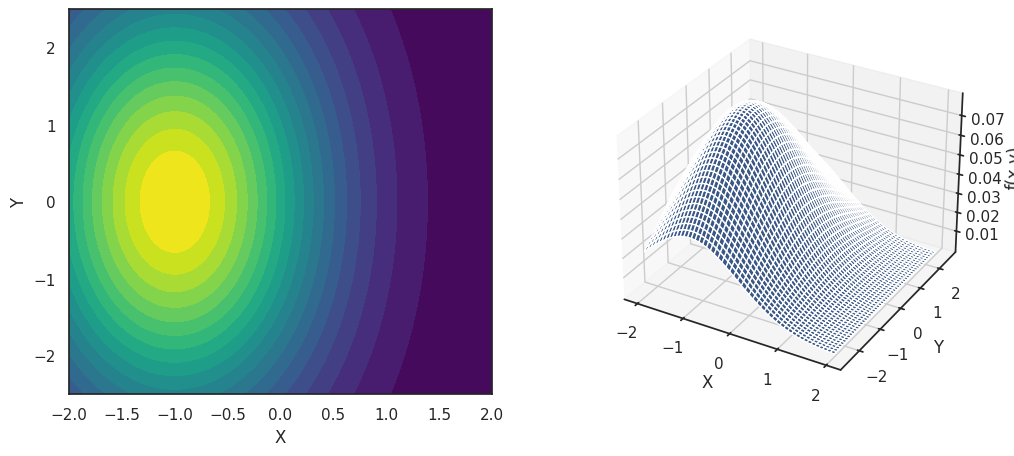

In [ ]:
f = lambda x, y: 0.25 / np.pi * np.exp(-(x + 1) ** 2 / 2) * np.exp(-y ** 2 / 8)
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2.5, 2.5, 1000)

xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)
levels = np.linspace(zgrid.min(), zgrid.max(), 20)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.remove()
ax3d = fig.add_subplot(122, projection='3d')
ax.contourf(xgrid, ygrid, zgrid, cmap='viridis', levels=levels)

ax3d.plot_surface(xgrid, ygrid, zgrid)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('f(x,y)')

ax.set_xlabel('X')
ax.set_ylabel('Y')

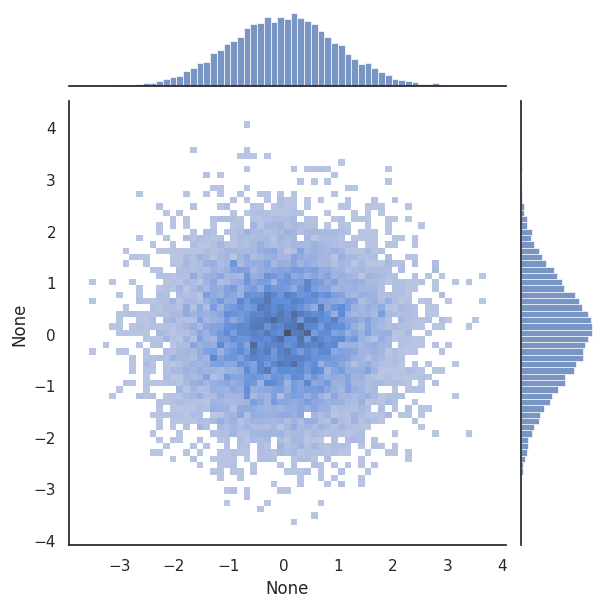

In [ ]:
X = np.random.default_rng().normal(0, 1, 10000)
Y = np.random.default_rng().normal(0, 1, 10000)

g = sns.jointplot(x=X, y=Y, kind='hist')

Легко видеть что при каждом значении $y$ случайная величина $X \sim \mathcal{N}(2, 1)$ имеет нормальное распределение, т.е. распределение $X$ при условии $Y$

$$
f(x|y) = \frac{1}{\sqrt{2\pi}} exp(-\frac{(x+2)^2}{2}).
$$

Другой пример это совместное распределение двух независимых случайныъ величин с экспоненциальной функцией распределения:
$$
f(x,y) = 4e^{-x}e^{-4y}
$$

Text(0, 0.5, 'Y')

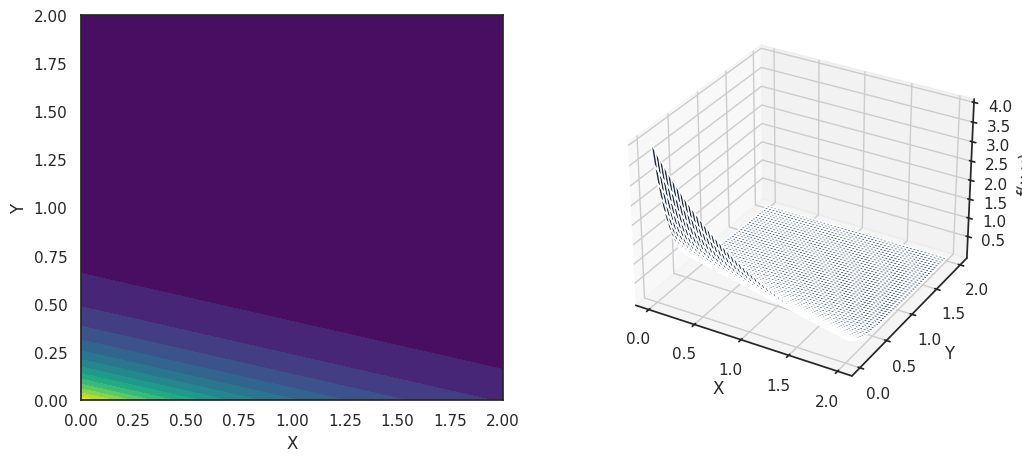

In [ ]:
f = lambda x, y: 4 * np.exp(-x) * np.exp(-4*y)
x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)

xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)
levels = np.linspace(zgrid.min(), zgrid.max(), 15)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.remove()
ax3d = fig.add_subplot(122, projection='3d')
ax.contourf(xgrid, ygrid, zgrid, cmap='viridis', levels=levels)

ax3d.plot_surface(xgrid, ygrid, zgrid)
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('f(x,y)')

ax.set_xlabel('X')
ax.set_ylabel('Y')

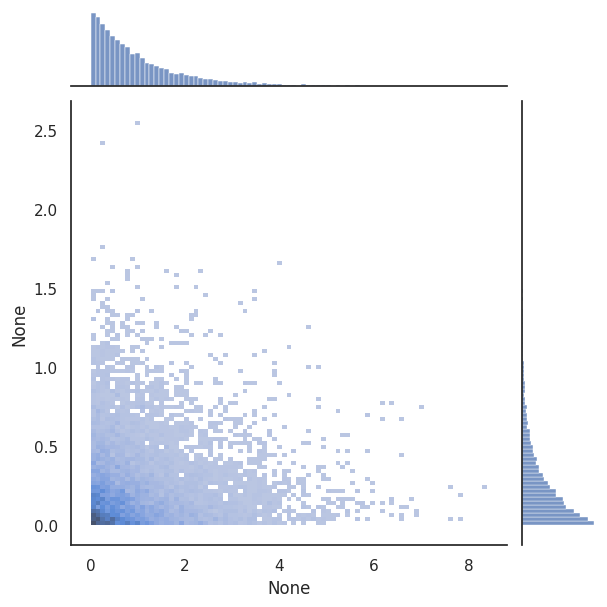

In [ ]:
X = np.random.default_rng().exponential(1, 10000)
Y = np.random.default_rng().exponential(0.25, 10000)

g = sns.jointplot(x=X, y=Y, kind='hist')

В данном случае условное распределение $X$ будет выглядеть следующим образом:

$$
f(x|y) = e^{-x}
$$

В случае же когда мы не можем факторизовать совместную функцию распределения $f(x, y)$ случайные величины будут зависимыми! И этот случай нас очень интересует!

Во первых нам бы очень хотелось бы характеризовать "зависимость" случайных величин как по величине зависимости (сильная/слабая) так и по характеру зависимости (линейная/нелинейная).

Для того чтобы этим всем заняться нужно для начала понять, что значит вообще что две случайные величины являются зависимыми и как нам охарактеризовать эту их зависимост.

Как было выяснено ранее случайные величины будут зависимыми, если мы не можем факторизовать совместную функцию распределения $f(x, y)$. Это приводит к тому что условные функции распределения не сохраняются постоянными, т.е.
$f(x|y)$ является функцией двух переменных, а не одной. В качестве примера рассмотрим $f(x, y) = x + y$. В данном случае условное распределение $X$ выражается как

$$
f(x|y) = \frac{f(x,y)}{f(y)}= \frac{f(x,y)}{\int^1_0 f(x,y)dx} = \frac{x + y}{y + 0.5}
$$

По сути у распределение $X$ меняется в зависимости от значения $y$. Посмотрим на функцию совместной плотности распределения


Text(0, 0.5, 'y')

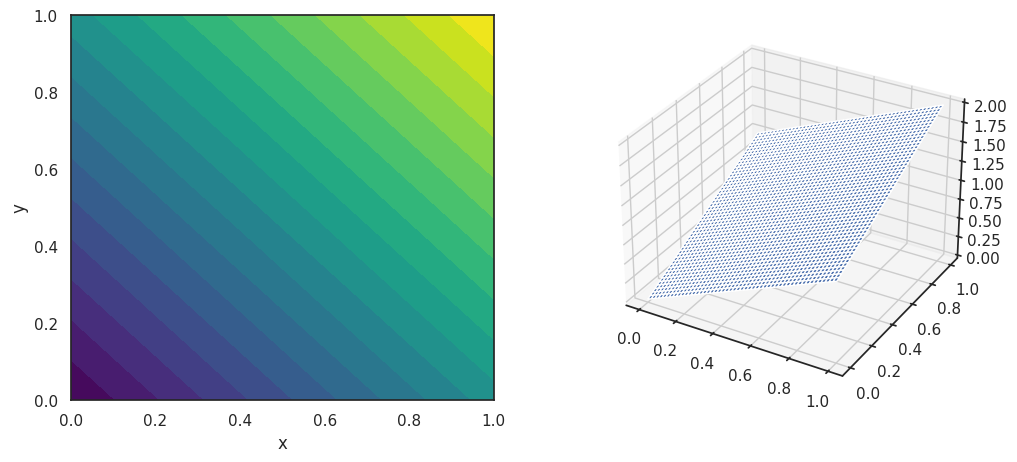

In [ ]:
f = lambda x, y: x + y
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)

xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)
levels = np.linspace(zgrid.min(), zgrid.max(), 20)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.remove()
ax3d = fig.add_subplot(122, projection='3d')
ax.contourf(xgrid, ygrid, zgrid, cmap='viridis', levels=levels)

ax3d.plot_surface(xgrid, ygrid, zgrid)

ax.set_xlabel('x')
ax.set_ylabel('y')

Чтобы сгенерировать распределение поступим следующим образом. Получим распределение для $Y$ из равномерного, после чего, когда будем наблюдать значение $Y$ будем генерировать $X$ используя условное распределение $f(x|y)$ снова же из равномерного распределения.

Для начала найдем кумулятивную функцию распределения $F(y)$ для случайной величины $Y$ и обраную к ней $F^{-1}(u)$ которую мы будем использовать для генерации $Y$ из рвномерного распределения

$$
F(y) = \int^y_0f(y)dy = \int^y_0 (y + 1/2)dy = \frac{1}{2}y(1 + y)
$$

$$
F^{-1}(u) = -\frac{1}{2} + \sqrt{\frac{1}{4} + 2u}
$$

Теперь найдем кумулятивную функцию распределения $F(x|y)$ и $F^{-1}(u|y)$ которую мы будем использовать для генерации $X$ из рвномерного распределения

$$
F(x|y) = \int^x_0 f(x|y)dx = \int^x_0\frac{x + y}{y + 0.5}dx = \frac{x^2 + 2xy}{2y + 1}
$$

$$
F^{-1}(u|y) = -y + \sqrt{y^2 + u(2y + 1)}
$$

Изобразим получившееся распределение

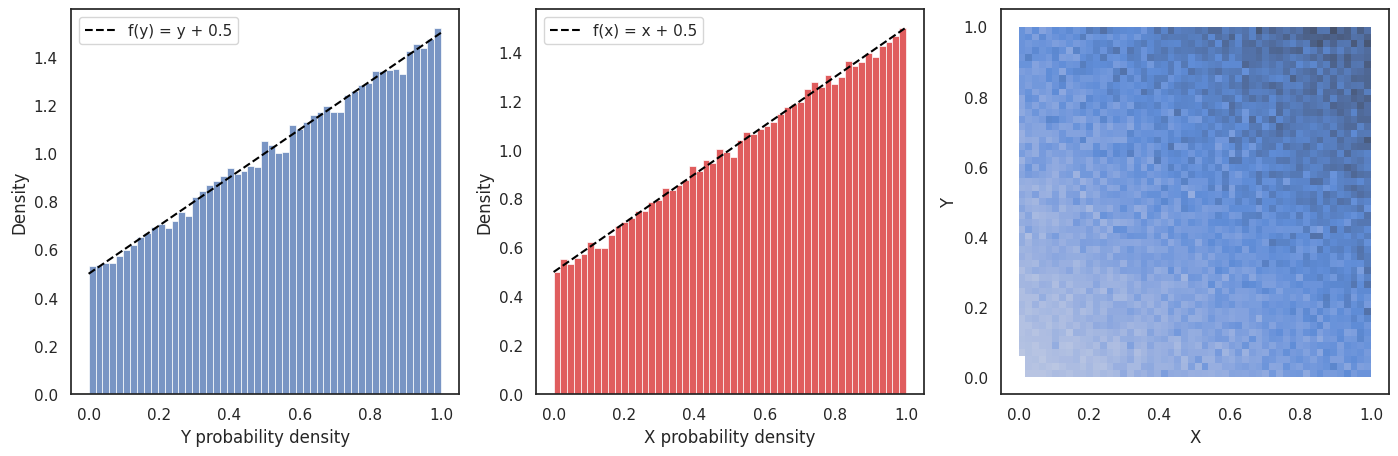

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})
n = 100000
U1 = np.random.default_rng().uniform(0, 1, n)
U2 = np.random.default_rng().uniform(0, 1, n)

Y = -0.5 + np.sqrt(0.25 + 2 * U1)
X = -Y + np.sqrt(Y ** 2 + U2 * (2 * Y + 1))

t = np.linspace(0, 1, 1000)

sns.histplot(Y, stat='density', ax=ax1)
ax1.plot(t, t + 1 / 2, linestyle='--', color='black', label="f(y) = y + 0.5")
ax1.set_xlabel('Y probability density')
ax1.legend()

sns.histplot(X, stat='density', ax=ax2, color='tab:red')
ax2.plot(t, t + 1 / 2, linestyle='--', color='black', label="f(x) = x + 0.5")
ax2.set_xlabel('X probability density')
ax2.legend()

sns.histplot(x=X, y=Y, ax=ax3)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

plt.show()

Дополнительно посмотрим на условное среднее $X$

$$
E[X|y] = \int^1_0 xf(x|y)dx = \int^1_0 \frac{x(x+y)}{y + 0.5}dx = \frac{2 + 3y}{3(2y + 1)}
$$

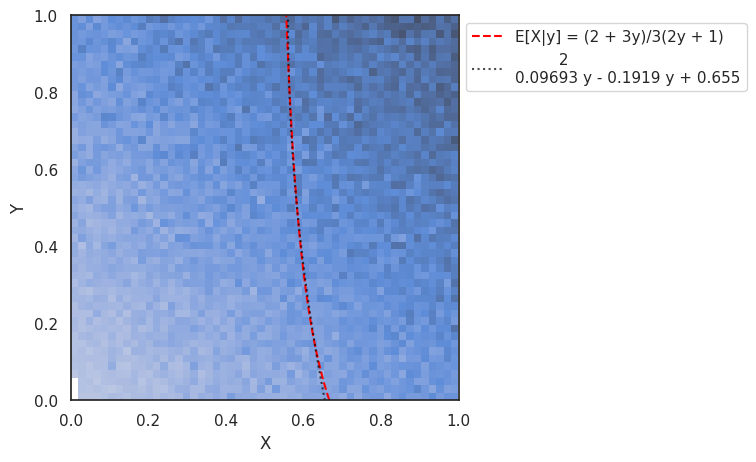

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(x=X, y=Y, ax=ax)
ax.plot((2 + 3 * t) / (6 * t + 3), t, linestyle='--', color='red', label="E[X|y] = (2 + 3y)/3(2y + 1)")

poly = np.poly1d(np.polyfit(Y, X, deg=2), variable="y")
ax.plot(poly(t), t, linestyle=':', color='black', label=str(poly), alpha=0.7)

ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
print(pearsonr(X, Y))
print(spearmanr(X, Y))
print(f"R2={r2_score(X, poly(Y)):.4f}, r={np.sqrt(r2_score(X, poly(Y))):.4f}")

PearsonRResult(statistic=-0.08799244807811281, pvalue=4.743393887437108e-171)
SignificanceResult(statistic=-0.08075788992805179, pvalue=2.5895595518928294e-144)
R2=0.0084, r=0.0916


Теперь посмотрим на другое расрпедление:
$$
f(x, y) = \sqrt{\frac{2}{\pi}}ye^{-\frac{(x-y)^2}{2}}, - \infty < x < \infty, 0 < y < 1
$$

В данном случае условное распределение $X$ выражается как

$$
f(x|y) = \frac{f(x,y)}{f(y)}= \frac{f(x,y)}{\int^{+\infty}_{-\infty}f(x,y)dx} = \frac{1}{\sqrt{2\pi}}e^{-\frac{(x-y)^2}{2}}
$$

Посмотрим на функцию совместной плотности распределения:

Text(0, 0.5, 'y')

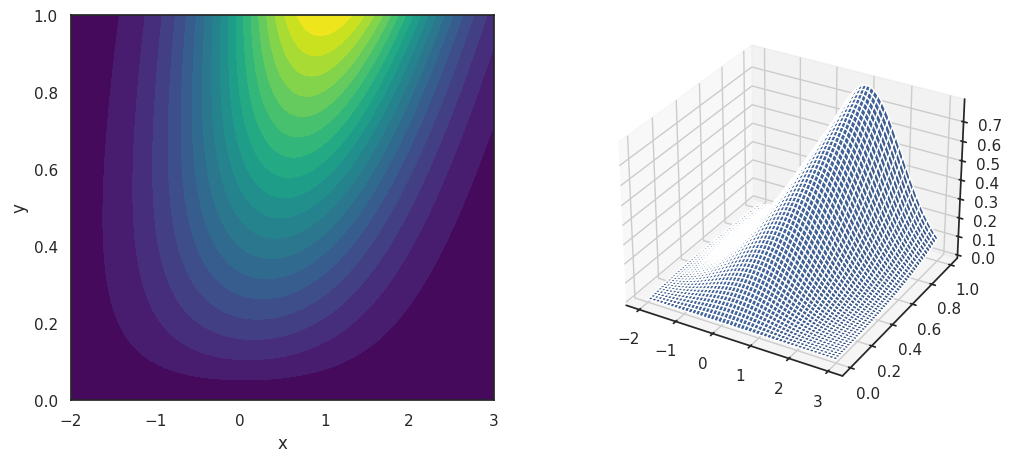

In [ ]:
f = lambda x, y: np.sqrt(2 / np.pi) * y * np.exp(- (x - y) ** 2 / 2)
x = np.linspace(-2, 3, 1000)
y = np.linspace(0, 1, 1000)

xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)
levels = np.linspace(zgrid.min(), zgrid.max(), 20)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.remove()
ax3d = fig.add_subplot(122, projection='3d')
ax.contourf(xgrid, ygrid, zgrid, cmap='viridis', levels=levels)
ax3d.plot_surface(xgrid, ygrid, zgrid)

ax.set_xlabel('x')
ax.set_ylabel('y')

В данном случае условное распределение $f(x|y)$  это просто нормальное распределение $\mathcal{N}(y, 1)$. Остается найти распределение $Y$ и обратную функцию распределения чтобы генерировать его

$$
f(y) = \int^{+\infty}_{-\infty}f(x,y)dx = 2y
$$

$$
F(y) = \int^y_0f(y)dy = \int^y_0 2ydy = y^2
$$

$$
F^{-1}(u) = \sqrt{u}
$$


Изобразим получившееся распределение

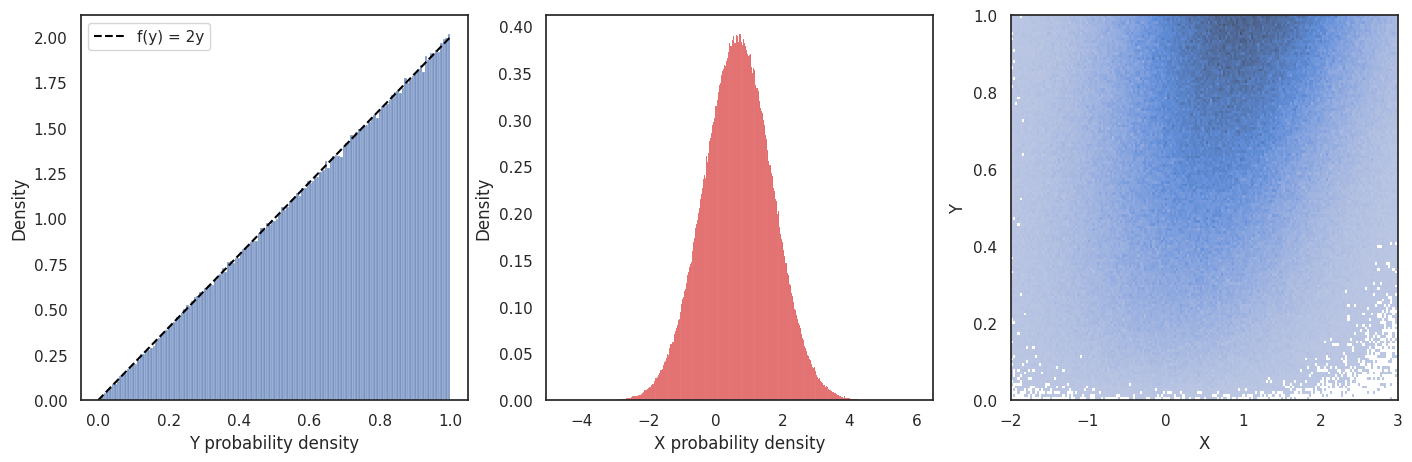

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})

U = np.random.default_rng().uniform(0, 1, 1000000)

Y = np.sqrt(U)
X = np.random.default_rng().normal(Y, 1)

t = np.linspace(0, 1, 1000)

sns.histplot(Y, stat='density', ax=ax1)
ax1.plot(t, 2 * t, linestyle='--', color='black', label="f(y) = 2y")
ax1.set_xlabel('Y probability density')
ax1.legend()

sns.histplot(X, stat='density', ax=ax2, color='tab:red')
ax2.set_xlabel('X probability density')

sns.histplot(x=X, y=Y, ax=ax3)
ax3.set_xlim(-2, 3)
ax3.set_ylim(0, 1)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

plt.show()

Дополнительно посмотрим на условное среднее $X$

$$
E[X|y] = \int^{+\infty}_{-\infty} xf(x|y)dx = \int^{+\infty}_{-\infty} \frac{x}{\sqrt{2\pi}}e^{-\frac{(x-y)^2}{2}}dx = y
$$

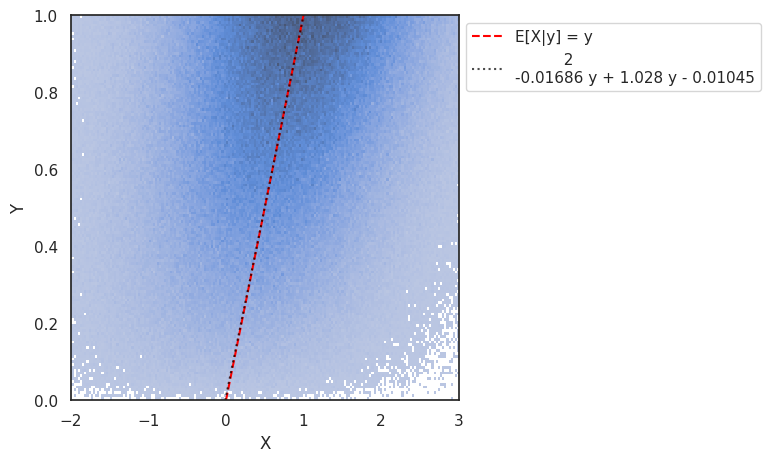

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

poly = np.poly1d(np.polyfit(Y, X, deg=2), variable="y")

sns.histplot(x=X, y=Y, ax=ax)
ax.plot(t, t, linestyle='--', color='red', label="E[X|y] = y")
ax.plot(poly(t), t, linestyle=':', color='black', label=str(poly), alpha=0.7)

ax.legend()
ax.set_xlim(-2, 3)
ax.set_ylim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
print(pearsonr(X, Y))
print(spearmanr(X, Y))
print(f"R2={r2_score(X, poly(Y)):.4f}, r={np.sqrt(r2_score(X, poly(Y))):.4f}")

PearsonRResult(statistic=0.23126930327926212, pvalue=0.0)
SignificanceResult(statistic=0.22277650557484202, pvalue=0.0)
R2=0.0535, r=0.2313


<Axes: xlabel='X', ylabel='Density'>

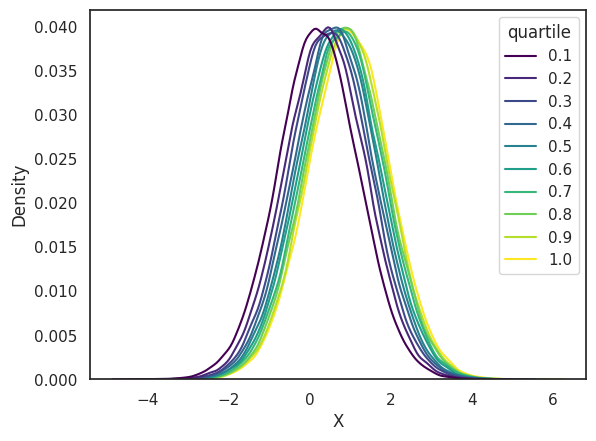

In [ ]:
import pandas as pd
n = 10
ind = np.argsort(Y)
ind_list = np.split(ind, n)
df = pd.DataFrame(X, columns=['X'])
for i, indexes in enumerate(ind_list):
    df.loc[indexes, 'quartile'] = (i + 1) / n
sns.kdeplot(df, x='X', palette="viridis", hue='quartile', multiple='layer')

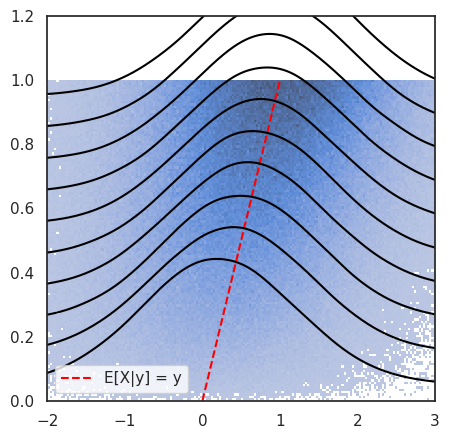

In [ ]:
from sklearn.neighbors import KernelDensity
l = np.linspace(-2, 3, 1000)

fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(x=X, y=Y, ax=ax)
ax.plot(t, t, linestyle='--', color='red', label="E[X|y] = y")

ax.set_xlim(-2, 3)
ax.set_ylim(0, 1.2)
ax.legend()

for q in df.quartile.unique():
    val = df[df.quartile == q].X.values.reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(val)
    ax.plot(l, np.exp(kde.score_samples(l.reshape(-1, 1))) + q - 0.05, 'black')

Теперь посмотрим на другое расрпедление:
$$
f(x, y) = \frac{1}{\sqrt{8\pi}}e^{-\frac{y^2}{2} - |x-y^2|}
$$

В данном случае условное распределение $X$ выражается как

$$
f(x|y) = \frac{f(x,y)}{f(y)}= \frac{f(x,y)}{\int^{+\infty}_{-\infty}f(x,y)dx} = \frac{1}{2}e^{-|x-y|}
$$

Посмотрим на функцию совместной плотности распределения:

Text(0, 0.5, 'y')

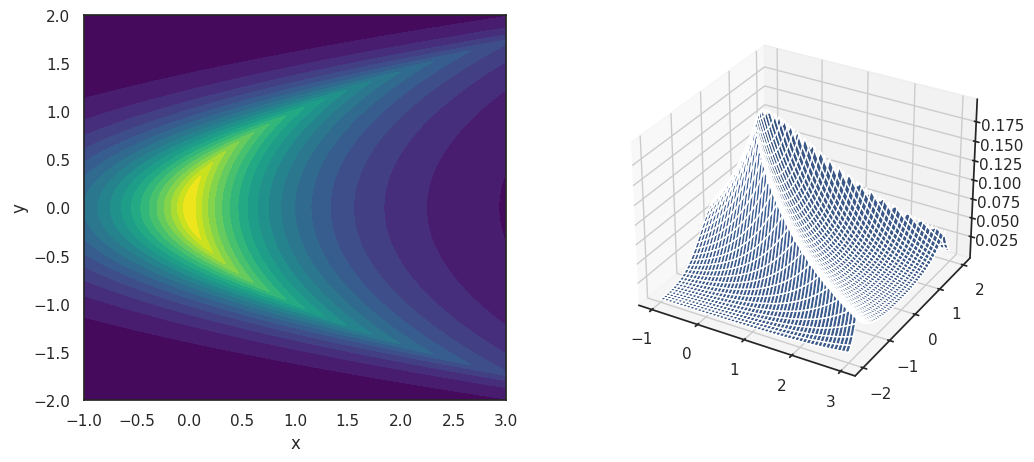

In [ ]:
f = lambda x, y: 1 / np.sqrt(8 * np.pi) * np.exp(- y ** 2 / 2 - np.abs(x - y ** 2))
x = np.linspace(-1, 3, 1000)
y = np.linspace(-2, 2, 1000)

xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)
levels = np.linspace(zgrid.min(), zgrid.max(), 20)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax2.remove()
ax3d = fig.add_subplot(122, projection='3d')
ax.contourf(xgrid, ygrid, zgrid, cmap='viridis', levels=levels)
ax3d.plot_surface(xgrid, ygrid, zgrid)

ax.set_xlabel('x')
ax.set_ylabel('y')

В данном случае условное распределение $f(x|y)$  это распределение Лапласа Остается найти распределение $Y$ и обратную функцию распределения чтобы генерировать его

$$
f(y) = \int^{+\infty}_{-\infty}f(x,y)dx = \frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}
$$

Случайная величина $Y$ имеет стандартное нормальное распределение. Изобразим получившееся совместное распределение.

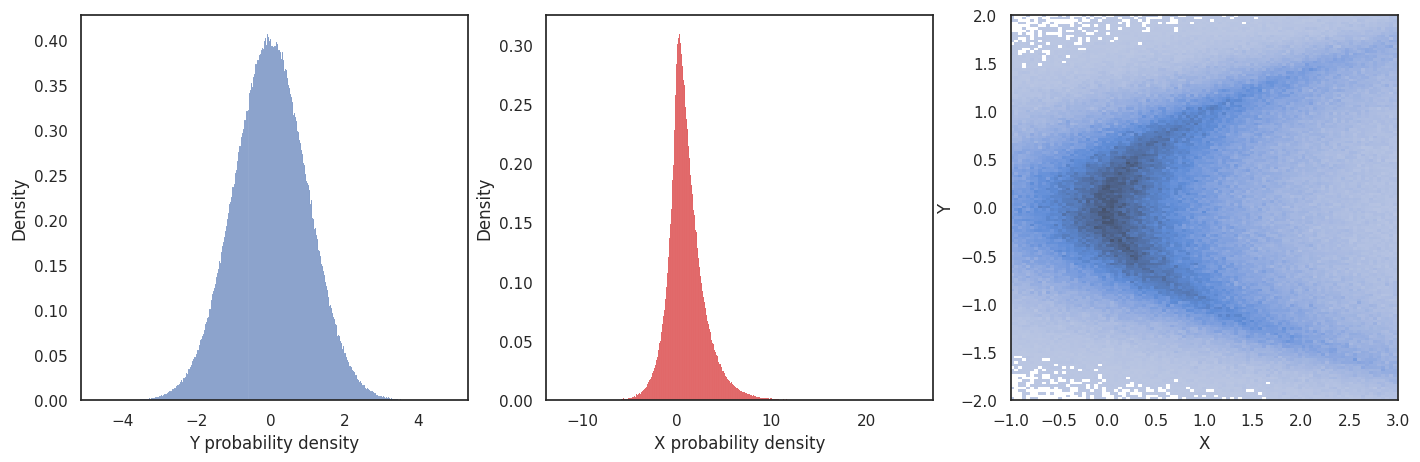

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5), gridspec_kw={'wspace': 0.2})

n = 1000000

Y = np.random.default_rng().normal(0, 1, n)
X = np.random.default_rng().laplace(Y ** 2, 1)

t = np.linspace(-2, 2, 1000)

sns.histplot(Y, stat='density', ax=ax1)
ax1.set_xlabel('Y probability density')

sns.histplot(X, stat='density', ax=ax2, color='tab:red')
ax2.set_xlabel('X probability density')

sns.histplot(x=X, y=Y, ax=ax3)
ax3.set_xlim(-1, 3)
ax3.set_ylim(-2, 2)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

plt.show()

Дополнительно посмотрим на условное среднее $X$

$$
E[X|y] = \int^{+\infty}_{-\infty} xf(x|y)dx = \int^{+\infty}_{-\infty} \frac{x}{2}e^{-|x-y^2|}dx = y^2
$$

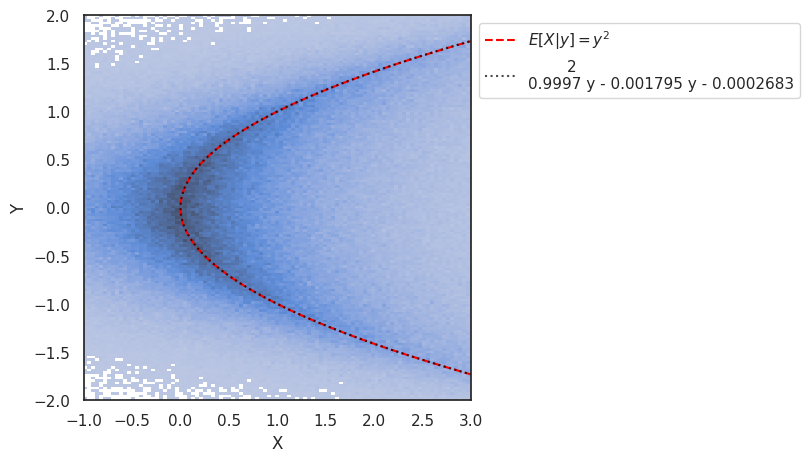

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.histplot(x=X, y=Y, ax=ax)
ax.plot(t ** 2, t, linestyle='--', color='red', label="$E[X|y] = y^2$")

poly = np.poly1d(np.polyfit(Y, X, deg=2), variable="y")
ax.plot(poly(t), t, linestyle=':', color='black', label=str(poly), alpha=0.7)

ax.legend()
ax.set_xlim(-1, 3)
ax.set_ylim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
print(pearsonr(X, Y))
print(spearmanr(X, Y))
print(f"R2={r2_score(X, poly(Y)):.4f}, r={np.sqrt(r2_score(X, poly(Y))):.4f}")

PearsonRResult(statistic=-0.002179369220750845, pvalue=0.02930426086539809)
SignificanceResult(statistic=-0.0019265898239742298, pvalue=0.054030845215516536)
R2=0.4988, r=0.7063


Так мы посмотрели на различные характеры зависимости двух случайных величин. Теперь посмотрим на то, что определяет силу зависимости.

Интуиция подсказывает, что сила зависимости должна определяться тем на сколько две случайные величины кучно собраны вокруг общего тренда зависимости. Рассмотрим случай линейной зависимости. Пусть $\mathbb{E}[Y|x] = ax + b$. Найдем коэффициенты $a$ и $b$:

$$
\mathbb{E}[Y] = a\mathbb{E}[X] + b\\
\mathbb{E}[XY] = a\mathbb{E}[X^2] + b\mathbb{E}[X]\\
Cov(X,Y) = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] = aVar(X)\\
a = \frac{Cov(X,Y)}{Var(X)}=\rho_{Pearson}\sqrt{\frac{Var(Y)}{Var(X)}}\\
b = \mathbb{E}(Y) - a\mathbb{E}(X)
$$

По смыслу это мы нашли коэффициенты прямой построенной по МНК. Отсюда уже видно что ковариация связывает коэффициент наклона прямой с дисперсией случайных величин.

Теперь давайте найдем долю объясненной дисперсии для случая линейной зависимости средних. В общем случае дисперсия $Y$ выражается как:

$$
Var(Y) = \mathbb{E}[Var(Y|X)] + Var(\mathbb{E}[Y|X]),
$$

где первое слагаемое это ошибка предсказания (так же известная как **MSE**), а второе слагаемое это объясненная дисперсия. Распишем второе слагаемое для случая линейной зависимости средних:

$$
Var(\mathbb{E}[Y|X]) = Var(aX + b) =a^2Var(X) = \frac{Cov(X, Y)^2}{Var(X)^2}Var(X)
$$

Теперь разделим полученное выражение на $Var(Y)$ чтобы найти долю объясненной дисперсии:

$$
\frac{Var(\mathbb{E}[Y|X])}{Var(Y)} = \frac{Cov(X, Y)^2}{Var(X)Var(Y)} = \rho^2_{Pearson}
$$

Получается, что квадрат корреляции Пирсона равняется доле объясненной дисперсии в случае линейной зависимости средних значений двух случайных величин.

По аналогии попробуем посмотреть на долю объясненной дисперсии для случая линейной зависимости случайных величин:

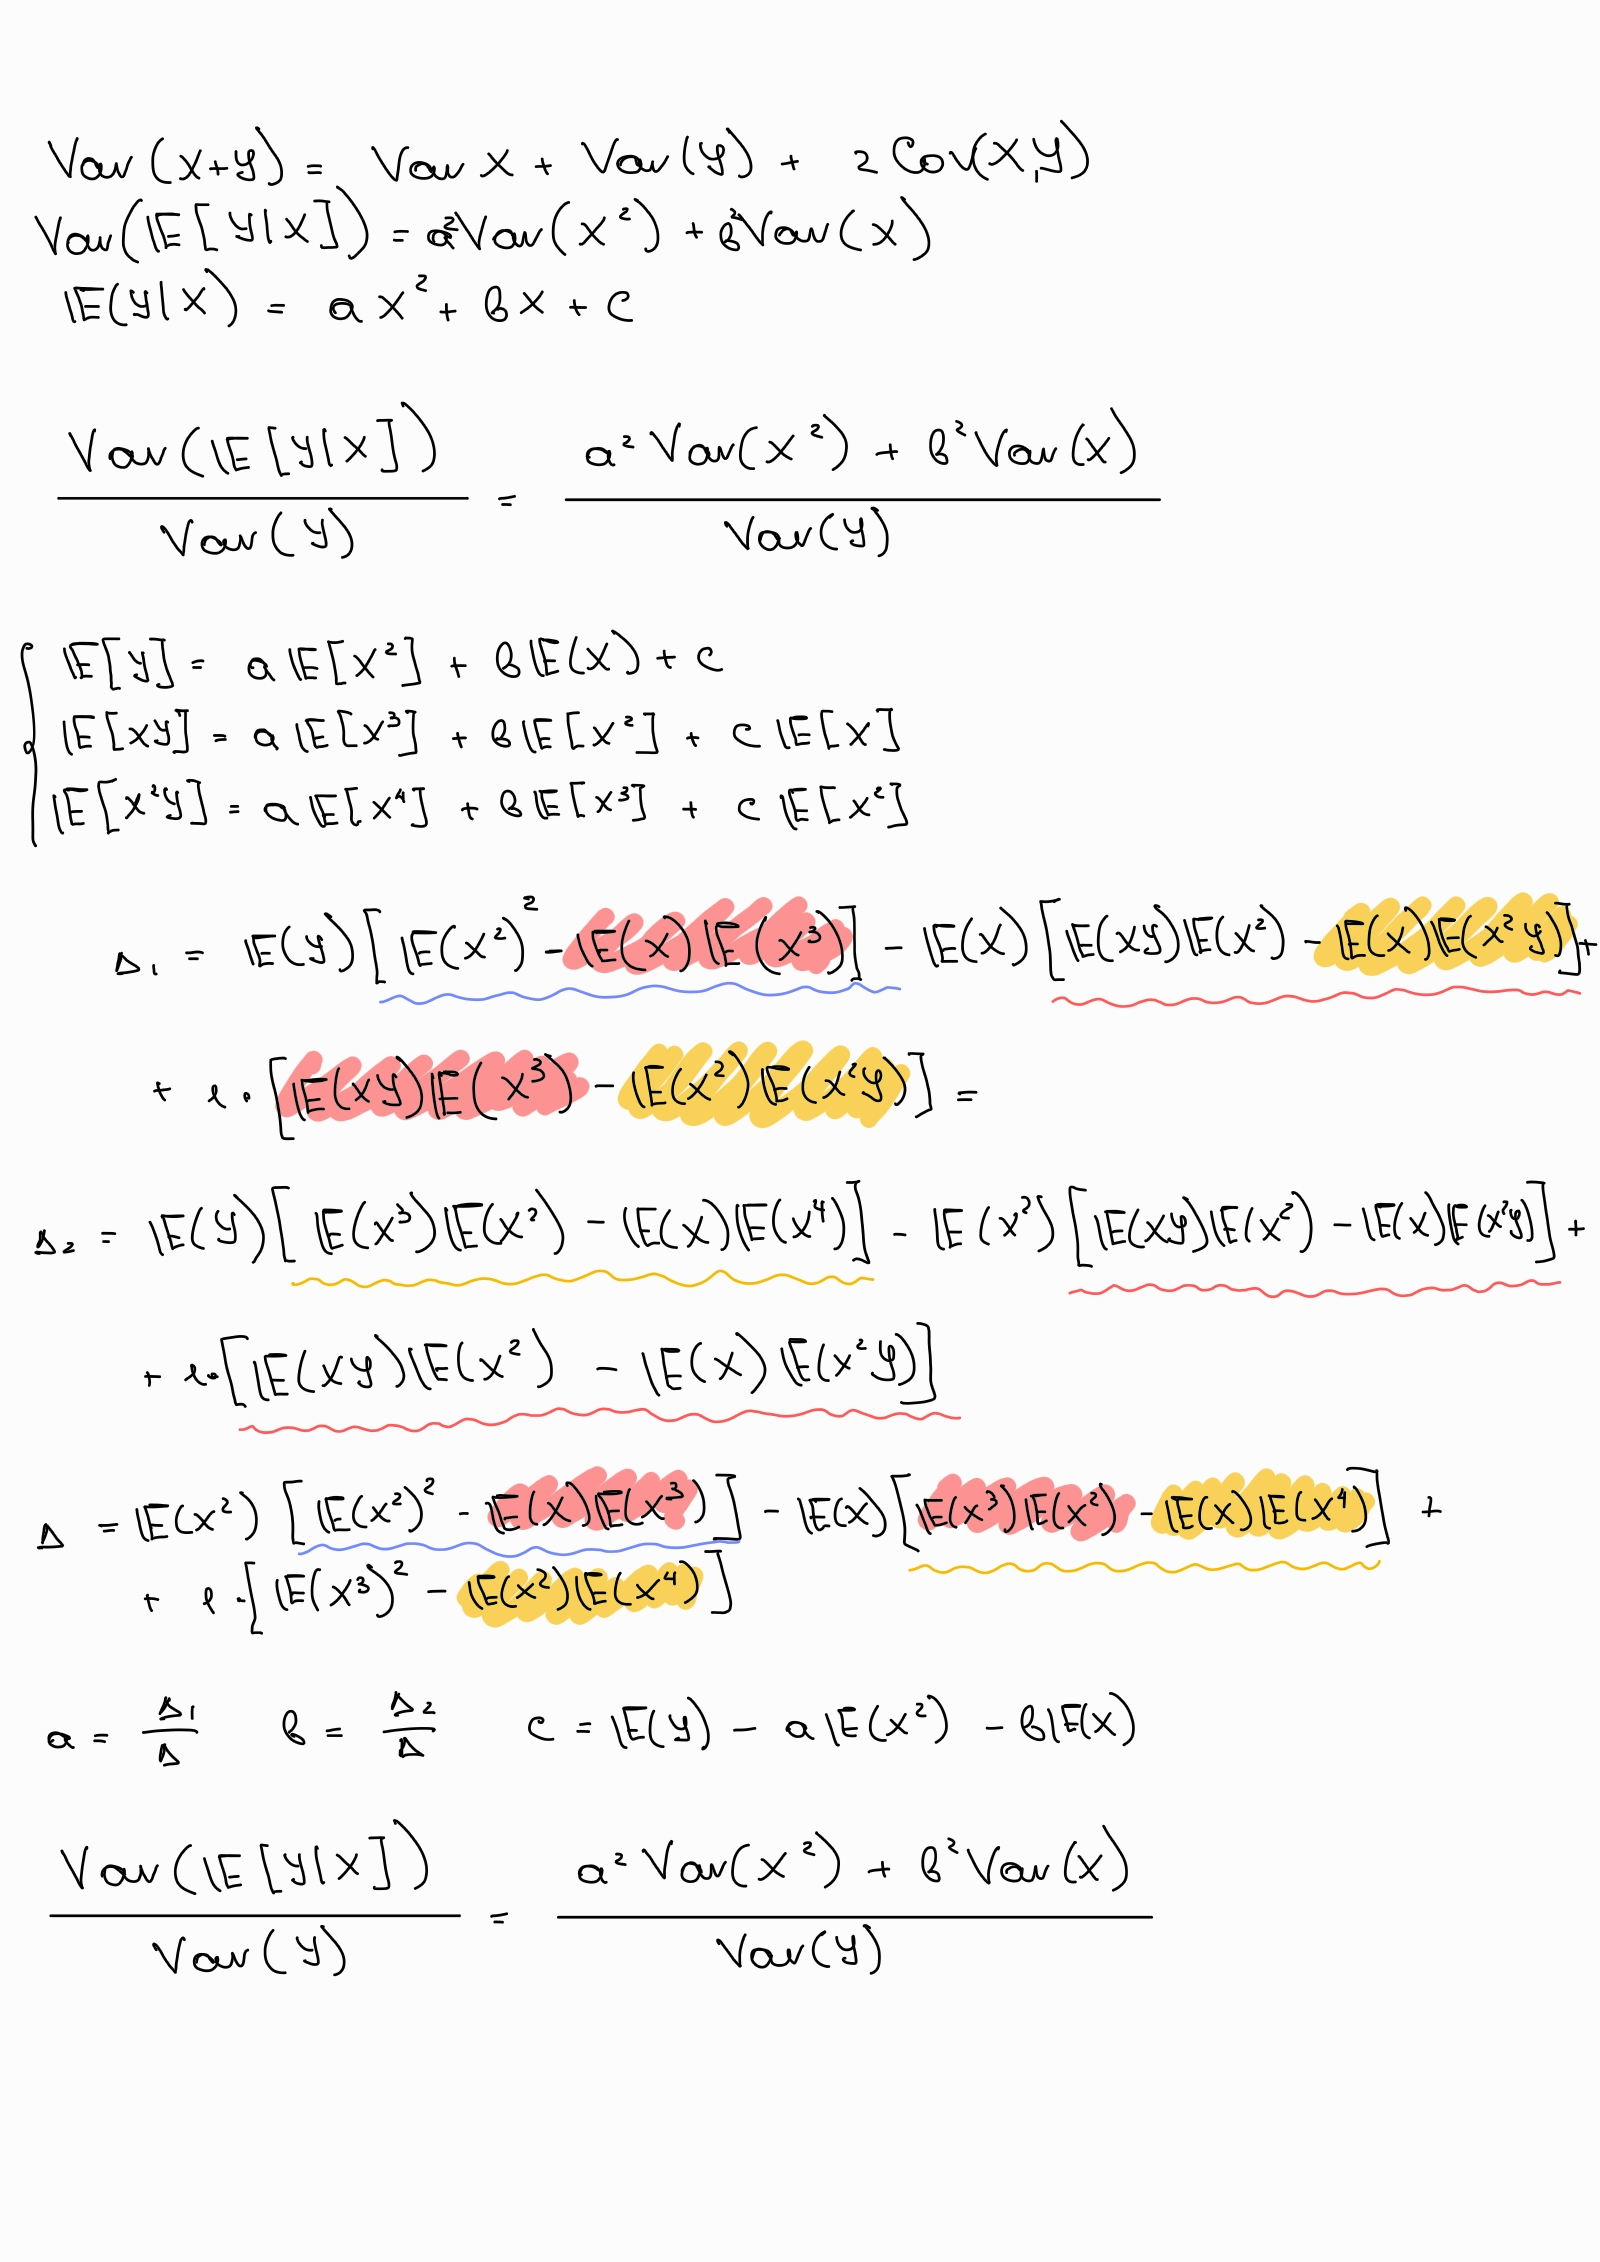

Сравним получившиеся выражения для коэффициентов регресси с обычным MSE

In [ ]:
# MSE coefficients
p = np.poly1d(np.polyfit(Y, X, deg=2))
p

poly1d([ 9.99721942e-01, -1.79547492e-03, -2.68279149e-04])

In [ ]:
# Our coeficients
def delta1(X, Y):
    v1 = np.mean(X ** 2) ** 2 - np.mean(X) * np.mean(X ** 3)
    v2 = np.mean(X * Y) * np.mean(X ** 2) - np.mean(X) * np.mean(X ** 2 * Y)
    v3 = np.mean(X * Y) * np.mean(X ** 3) - np.mean(X ** 2) * np.mean(X ** 2 * Y)
    return Y.mean() * v1 - X.mean() * v2 + v3

def delta2(X, Y):
    v1 = np.mean(X ** 3) * np.mean(X ** 2) - np.mean(X) * np.mean(X ** 4)
    v2 = np.mean(X * Y) * np.mean(X ** 2) - np.mean(X) * np.mean(X ** 2 * Y)
    return Y.mean() * v1 - np.mean(X ** 2) * v2 + v2

def delta(X, Y):
    v1 = np.mean(X ** 2) ** 2 - np.mean(X) * np.mean(X ** 3)
    v2 = np.mean(X ** 3) * np.mean(X ** 2) - np.mean(X) * np.mean(X ** 4)
    v3 = np.mean(X ** 3) ** 2 - np.mean(X ** 2) * np.mean(X ** 4)
    return np.mean(X ** 2)  * v1 - X.mean() * v2 + v3

def quadr_coef(X, Y):
    d1, d2, d = delta1(X, Y), delta2(X, Y), delta(X, Y)
    a = d1 / d
    b = d2 / d
    c = Y.mean() - a * np.mean(X ** 2) - b * X.mean()
    return a, b, c

In [ ]:
a, b, c = quadr_coef(Y, X)
a, b, c

(0.9997219417418086, -0.0003432188694653659, -0.0002659189631692237)

In [ ]:
R2 = (a ** 2 * np.var(Y ** 2) + b ** 2  * Y.var()) / X.var()
print(f"R2={R2:.4f}, r={np.sqrt(R2):.4f}")

R2=0.4988, r=0.7063


Как видим они полностью совпадают